# Titanic 
## Model Building and Evaluation

In [1]:
def get_oof(clf, x_train, y_train, x_test):
    oof_train = np.zeros((ntrain,))
    oof_test = np.zeros((ntest,))
    oof_test_skf = np.empty((NFOLDS, ntest))

    for i, (train_index, test_index) in enumerate(kf):
        x_tr = x_train[train_index]
        y_tr = y_train[train_index]
        x_te = x_train[test_index]

        clf.fit(x_tr, y_tr)

        oof_train[test_index] = clf.predict(x_te)
        oof_test_skf[i, :] = clf.predict(x_test)

    oof_test[:] = oof_test_skf.mean(axis=0)
    return oof_train.reshape(-1, 1), oof_test.reshape(-1, 1)

## Model Parameters

In [2]:
# Put in our parameters for said classifiers
# Random Forest parameters
rf_params = {
    'n_jobs': -1,
    'n_estimators': 500,
     'warm_start': True, 
     #'max_features': 0.2,
    'max_depth': 6,
    'min_samples_leaf': 2,
    'max_features' : 'sqrt',
    'verbose': 0
}

# Extra Trees Parameters
et_params = {
    'n_jobs': -1,
    'n_estimators':500,
    #'max_features': 0.5,
    'max_depth': 8,
    'min_samples_leaf': 2,
    'verbose': 0
}

# AdaBoost parameters
ada_params = {
    'n_estimators': 500,
    'learning_rate' : 0.75
}

# Gradient Boosting parameters
gb_params = {
    'n_estimators': 500,
     #'max_features': 0.2,
    'max_depth': 5,
    'min_samples_leaf': 2,
    'verbose': 0
}

# Support Vector Classifier parameters 
svc_params = {
    'kernel' : 'linear',
    'C' : 0.025
    }

## Models 

In [5]:
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier, 
                              GradientBoostingClassifier, ExtraTreesClassifier)
from sklearn.svm import SVC

# Create 5 objects that represent our 4 models
seed = 69
rf = RandomForestClassifier(rf_params, random_state=seed)
et = ExtraTreesClassifier(et_params, random_state=seed)
ada = AdaBoostClassifier(ada_params, random_state=seed)
gb = GradientBoostingClassifier(gb_params, random_state=seed)
svc = SVC(svc_params, random_state=seed)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:70: FutureWarning: Pass loss={'n_estimators': 500, 'max_depth': 5, 'min_samples_leaf': 2, 'verbose': 0} as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:70: FutureWarning: Pass C={'kernel': 'linear', 'C': 0.025} as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


## Split Data

In [17]:
import pandas as pd

df = pd.read_csv('../data/titanic_clean_data.csv')
target = 'Survived'
features = [ col for col in df.columns if col != target ]
X, y = df[features], df[target]

In [18]:
X

,Pclass,Sex,Age,Parch,Fare,Embarked,NameLength,HasCabin,FamilySize,IsAlone,CategoricalFare,CategoricalAge,Title
0,3,1,22,0,7.2500,0,23,0,2,0,0,1,3
1,1,0,38,0,71.2833,1,51,1,2,0,3,3,2
2,3,0,26,0,7.9250,0,22,0,1,1,1,2,4
3,1,0,35,0,53.1000,0,44,1,2,0,3,3,2
4,3,1,35,0,8.0500,0,24,0,1,1,1,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,1,27,0,13.0000,0,21,0,1,1,1,2,4
887,1,0,19,0,30.0000,0,28,1,1,1,2,0,4
888,3,0,39,2,23.4500,0,40,0,4,0,2,3,4
889,1,1,26,0,30.0000,1,21,1,1,1,2,2,3


In [22]:
from sklearn.model_selection import cross_val_score

rf = RandomForestClassifier()
scores = cross_val_score(rf, X, y, cv=10)


In [23]:
scores

array([0.74444444, 0.82022472, 0.74157303, 0.82022472, 0.84269663,
       0.84269663, 0.76404494, 0.7752809 , 0.87640449, 0.83146067])

In [29]:
features

['Pclass',
 'Sex',
 'Age',
 'Parch',
 'Fare',
 'Embarked',
 'NameLength',
 'HasCabin',
 'FamilySize',
 'IsAlone',
 'CategoricalFare',
 'CategoricalAge',
 'Title']

In [34]:
rf = RandomForestClassifier(random_state=seed)
et = ExtraTreesClassifier(random_state=seed)
ada = AdaBoostClassifier(random_state=seed)
gb = GradientBoostingClassifier(random_state=seed)

models = [rf, et, ada, gb]
model_names = ['RandomForest', 'ExtraTrees', 'Ada', 'GradientBoost']
[ m.fit(X, y) for m in models ]
feature_importances = { name: m.feature_importances_ for name, m in zip(model_names, models) }

## Feature Data Frame

In [45]:
feature_df = pd.DataFrame(feature_importances)
feature_df.insert(0, 'features', features)

In [46]:
feature_df

,features,RandomForest,ExtraTrees,Ada,GradientBoost
0,Pclass,0.060052,0.070452,0.02,0.116565
1,Sex,0.166070,0.205421,0.02,0.458202
2,Age,0.144487,0.118322,0.30,0.103213
3,Parch,0.019998,0.021559,0.02,0.000766
4,Fare,0.152547,0.113612,0.24,0.119394
5,Embarked,0.029024,0.036728,0.02,0.018983
6,NameLength,0.151878,0.140007,0.22,0.062635
7,HasCabin,0.042715,0.051182,0.02,0.042090
8,FamilySize,0.049954,0.041620,0.08,0.060755
9,IsAlone,0.009983,0.016337,0.00,0.000286


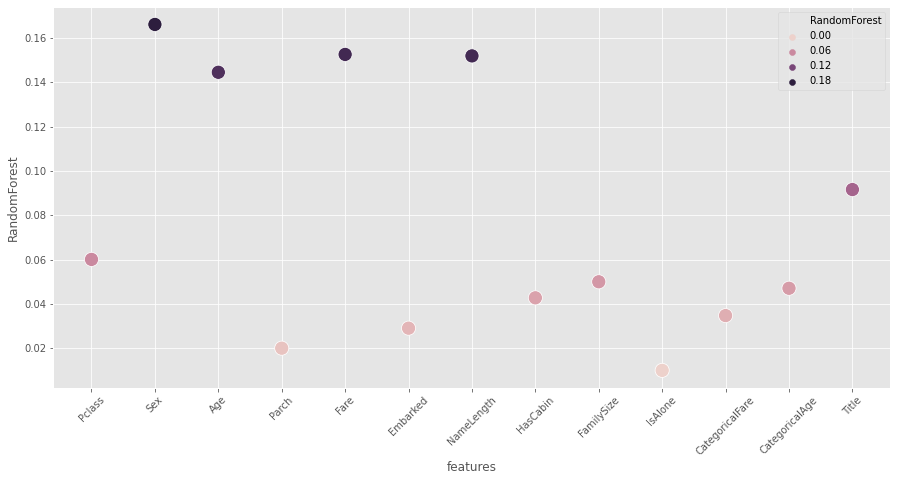

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_feature_importance(x, y, hue=None):
    if hue is None:
        hue = y
    plt.figure(figsize=(15, 7))
    g = sns.scatterplot(x=x, y=y, hue=y, s=200)
    plt.xticks(rotation=45);
    plt.show();
    
plot_feature_importance(feature_df.features, feature_df.RandomForest)

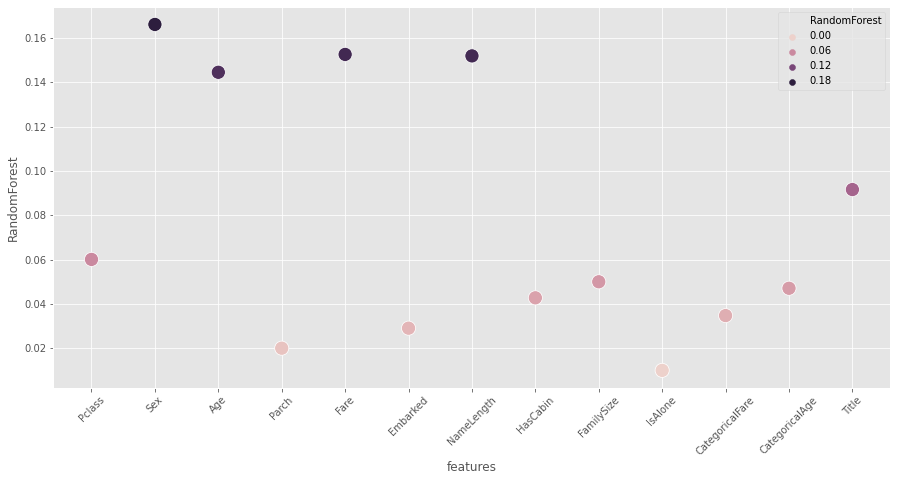

<Figure size 432x288 with 0 Axes>

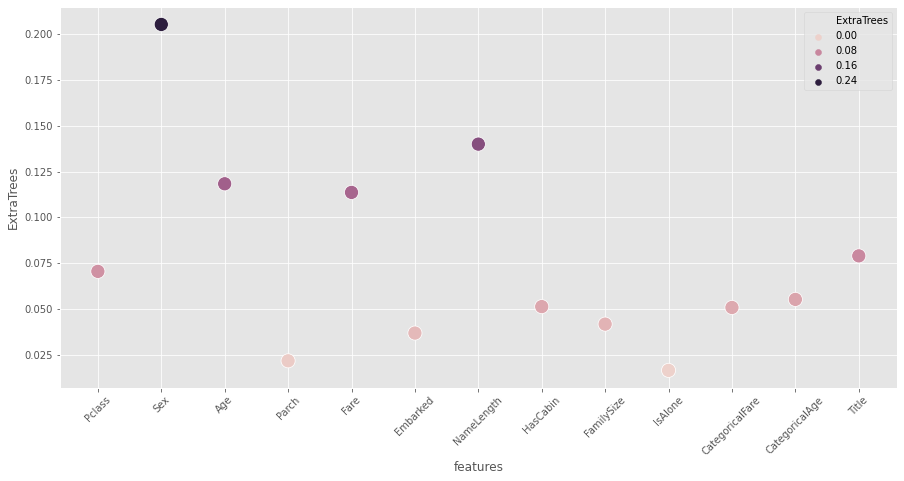

<Figure size 432x288 with 0 Axes>

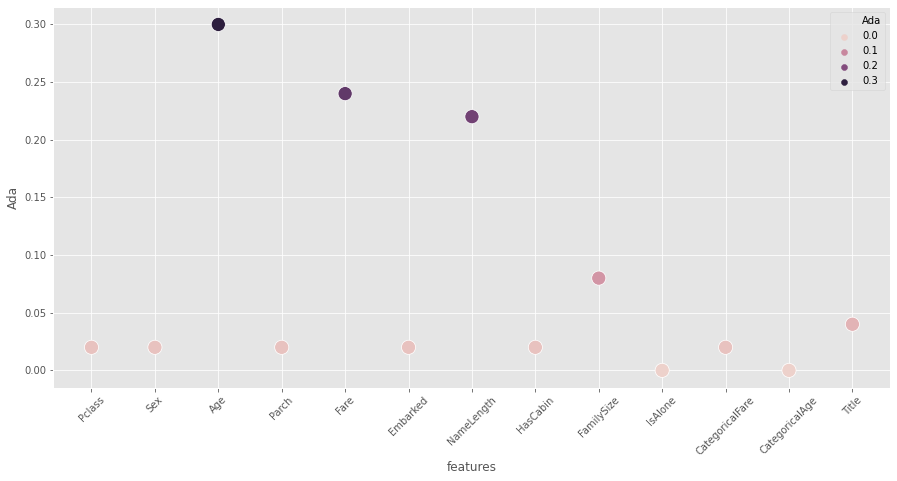

<Figure size 432x288 with 0 Axes>

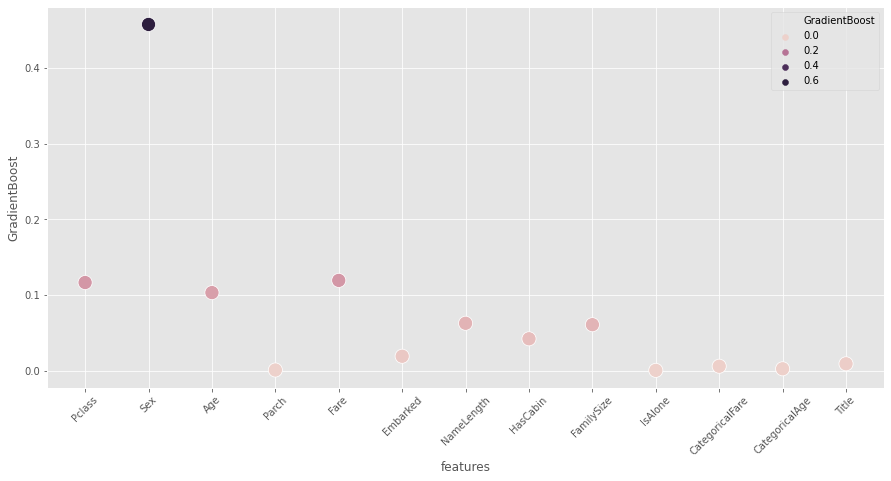

<Figure size 432x288 with 0 Axes>

In [65]:
for col in model_names:
    plot_feature_importance(feature_df.features, feature_df[col])
    plt.figure()

### Mean of Importance

In [67]:
feature_df['mean'] = feature_df.mean(axis=1)
feature_df

,features,RandomForest,ExtraTrees,Ada,GradientBoost,mean
0,Pclass,0.060052,0.070452,0.02,0.116565,0.066767
1,Sex,0.166070,0.205421,0.02,0.458202,0.212423
2,Age,0.144487,0.118322,0.30,0.103213,0.166506
3,Parch,0.019998,0.021559,0.02,0.000766,0.015580
4,Fare,0.152547,0.113612,0.24,0.119394,0.156388
5,Embarked,0.029024,0.036728,0.02,0.018983,0.026184
6,NameLength,0.151878,0.140007,0.22,0.062635,0.143630
7,HasCabin,0.042715,0.051182,0.02,0.042090,0.038997
8,FamilySize,0.049954,0.041620,0.08,0.060755,0.058082
9,IsAlone,0.009983,0.016337,0.00,0.000286,0.006652


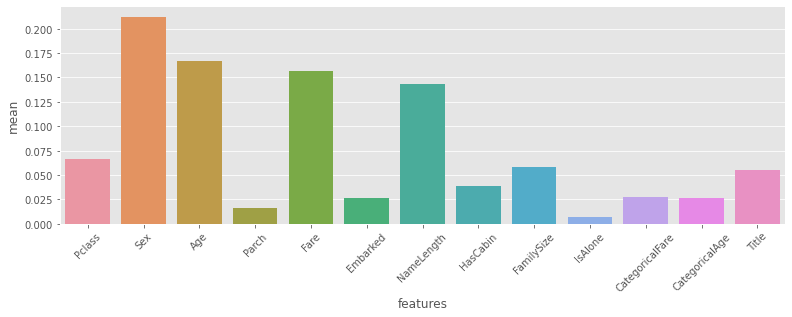

In [74]:
plt.figure(figsize=(13, 4))
sns.barplot(x=feature_df.features, y=feature_df['mean']);
plt.xticks(rotation=45);


In [76]:
from sklearn.ensemble import VotingClassifier

vc = VotingClassifier(estimators=[
    (name, m) for name, m in zip(model_names, models)
])

In [77]:
vc.fit(X, y)

VotingClassifier(estimators=[('RandomForest',
                              RandomForestClassifier(random_state=69)),
                             ('ExtraTrees',
                              ExtraTreesClassifier(random_state=69)),
                             ('Ada', AdaBoostClassifier(random_state=69)),
                             ('GradientBoost',
                              GradientBoostingClassifier(random_state=69))])

In [83]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [80]:
scores = cross_val_score(vc, X, y, cv=5, scoring='accuracy')
scores

array([0.81005587, 0.80898876, 0.8258427 , 0.78651685, 0.84831461])

In [84]:
vc.fit(X_train, y_train)

VotingClassifier(estimators=[('RandomForest',
                              RandomForestClassifier(random_state=69)),
                             ('ExtraTrees',
                              ExtraTreesClassifier(random_state=69)),
                             ('Ada', AdaBoostClassifier(random_state=69)),
                             ('GradientBoost',
                              GradientBoostingClassifier(random_state=69))])

In [85]:
pred = vc.predict(X_test)
100. * (pred == y_test).mean()

79.88826815642457